# Advanced Machine Learning Nanodegree
## Capstone Project
## Project:  Prediction of Stock Price

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the Bank Niftyusing a dataset of past prices


## Get the Data

In the following cells we read the which we downloaded from National Stock Exchange Website (https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm).

   **Step 1 :** Required Packages are imported and data is read

In [1]:
import pandas as pd
import datetime
data = pd.read_csv('v_bank_nifty.csv')

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [2]:
import pandas as pd
import numpy as np

#Renaming the Column names as per the financial market standard
data.rename(columns={'Shares Traded':'Volume',
                          'Turnover (Rs. Cr)':'Turnover'},inplace=True)

#Sample data dispalyed
print(data.head())

#Required Maths calculations are done 
print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))
print("Turn.O --- mean :", np.mean(data['Turnover']),"  \t Std: ", np.std(data['Turnover']),"  \t Max: ", np.max(data['Turnover']),"  \t Min: ", np.min(data['Turnover']))


        Date     Open     High      Low    Close     Volume  Turnover
0  01-Jan-08  6136.75  6165.35  6109.85  6144.35   81305366   4410.97
1  02-Jan-08  6144.70  6197.00  6060.85  6179.40  110353305   7184.35
2  03-Jan-08  6184.25  6230.15  6126.40  6178.55  156427760   9475.37
3  04-Jan-08  6179.10  6300.05  6179.10  6274.30  147642063   8779.23
4  07-Jan-08  6271.00  6289.80  6193.35  6279.10  139778977   8873.37


Open   --- mean : 6963.446213729645   	 Std:  2290.955577376435   	 Max:  12052.65   	 Min:  2526.2
High   --- mean : 7004.592392073593   	 Std:  2287.0091030936446   	 Max:  12103.05   	 Min:  2585.3
Low    --- mean : 6911.586394196764   	 Std:  2289.5635729660344   	 Max:  12005.85   	 Min:  2252.75
Close  --- mean : 6958.5147912243565   	 Std:  2287.960306242476   	 Max:  12088.55   	 Min:  2524.2
Volume --- mean : 195436167.0279547   	 Std:  84129125.37035412   	 Max:  741153209   	 Min:  2768292
Turn.O --- mean : 8464.916206652517   	 Std:  3873.694247427281   	 Max:

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [3]:
import preprocess_data as ppd
stock = ppd.remove_data(data)

#Print the dataframe head and tail
print(stock.head())
print("---")
print(stock.tail())

   Item      Open     Close     Volume
0     0  11910.10  11823.30  390294634
1     1  11873.90  11914.05  447901993
2     2  11962.45  11906.20  283718253
3     3  11959.85  11965.60  332181958
4     4  11934.90  11922.70  303329445
---
      Item     Open    Close     Volume
2821  2821  6271.00  6279.10  139778977
2822  2822  6179.10  6274.30  147642063
2823  2823  6184.25  6178.55  156427760
2824  2824  6144.70  6179.40  110353305
2825  2825  6136.75  6144.35   81305366


**Step 2: ** Visualise raw data.

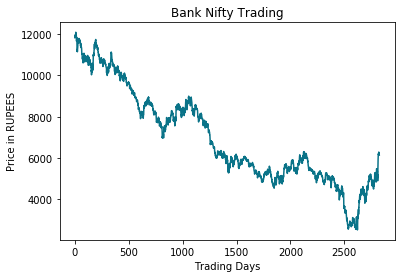

In [5]:
import v_visualize as vi

vi.plot_basic(stock)

**Step 3 :** Normalise the data using minmaxscaler function

In [6]:
stock = ppd.get_normalised_data(stock)
print(stock.head())

print("\n")
print("Open   --- mean :", np.mean(stock['Open']),  "  \t Std: ", np.std(stock['Open']),  "  \t Max: ", np.max(stock['Open']),  "  \t Min: ", np.min(stock['Open']))
print("Close  --- mean :", np.mean(stock['Close']), "  \t Std: ", np.std(stock['Close']), "  \t Max: ", np.max(stock['Close']), "  \t Min: ", np.min(stock['Close']))
print("Volume --- mean :", np.mean(stock['Volume']),"  \t Std: ", np.std(stock['Volume']),"  \t Max: ", np.max(stock['Volume']),"  \t Min: ", np.min(stock['Volume']))

   Item      Open     Close    Volume
0     0  0.985036  0.972267  0.524830
1     1  0.981236  0.981755  0.602848
2     2  0.990532  0.980934  0.380493
3     3  0.990259  0.987145  0.446127
4     4  0.987640  0.982660  0.407052


Open   --- mean : 0.4657817144612799   	 Std:  0.2404836615293666   	 Max:  0.9999999999999998   	 Min:  0.0
Close  --- mean : 0.4636294982120443   	 Std:  0.2392175428798064   	 Max:  1.0000000000000002   	 Min:  0.0
Volume --- mean : 0.2609314878894725   	 Std:  0.11393667914041924   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

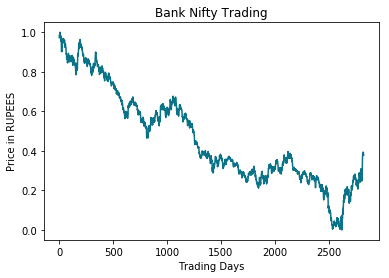

In [7]:
vi.plot_basic(stock)

**Step 5:** Log the normalised data for future resuablilty

In [10]:
stock.to_csv('v_bank_nifty_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [11]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import v_visualize as vs
import stock_data as sd
import LinearRegressionModel

stock = pd.read_csv('v_bank_nifty_preprocessed.csv')
display(stock.head())

,Item,Open,Close,Volume
0,0,0.985036,0.972267,0.524830
1,1,0.981236,0.981755,0.602848
2,2,0.990532,0.980934,0.380493
3,3,0.990259,0.987145,0.446127
4,4,0.987640,0.982660,0.407052


**Step 2:** Split data into train and test pair

In [12]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stock)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1936, 1)
y_train (1936, 1)
x_test (890, 1)
y_test (890, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [13]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [14]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

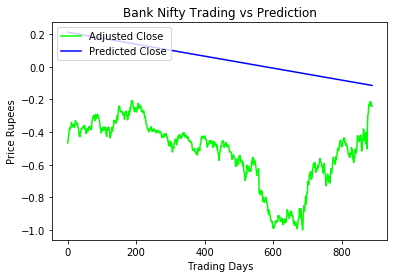

In [15]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [16]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.8627 MSE (0.9288 RMSE)
Test Score: 0.35408284 MSE (0.59504860 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [17]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import v_visualize as vs
import stock_data as sd
import LinearRegressionModel

stock = pd.read_csv('v_bank_nifty_preprocessed.csv')
stocks_data = stock.drop(['Item'], axis =1)

display(stocks_data.head())
stocks_data.shape

C:\Users\Venky\Anaconda3\Lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,Open,Close,Volume
0,0.985036,0.972267,0.524830
1,0.981236,0.981755,0.602848
2,0.990532,0.980934,0.380493
3,0.990259,0.987145,0.446127
4,0.987640,0.982660,0.407052


(2826, 3)

**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [18]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)
print("x_train", X_train.shape)
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2370, 3)
x_train (2320, 50, 3)
y_train (2320,)
x_test (396, 50, 3)
y_test (396,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [19]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

Instructions for updating:
Colocations handled automatically by placer.
compilation time :  0.09600973129272461


**Step 4:** Train the model

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Instructions for updating:
Use tf.cast instead.
Train on 2204 samples, validate on 116 samples
Epoch 1/1
2204/2204 [==============================] - 10s 5ms/step - loss: 0.0160 - val_loss: 5.8037e-04


**Step 5:** make prediction using test data

In [21]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

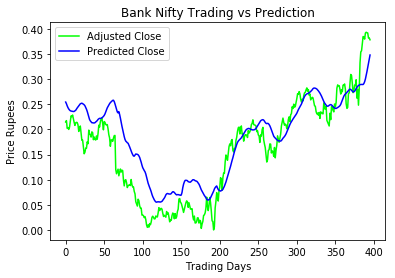

In [22]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [23]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00057929 MSE (0.02406843 RMSE)
Test Score: 0.00234837 MSE (0.04845994 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [24]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
compilation time :  0.10301041603088379


**Step 2: ** Train improved LSTM model

In [25]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2204 samples, validate on 116 samples
Epoch 1/5
 - 9s - loss: 0.0422 - val_loss: 0.0112
Epoch 2/5
 - 6s - loss: 0.0054 - val_loss: 0.0023
Epoch 3/5
 - 6s - loss: 0.0023 - val_loss: 3.0196e-04
Epoch 4/5
 - 6s - loss: 0.0022 - val_loss: 3.1358e-04
Epoch 5/5
 - 6s - loss: 0.0019 - val_loss: 2.9985e-04


**Step 3:** Make prediction on improved LSTM model

In [26]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

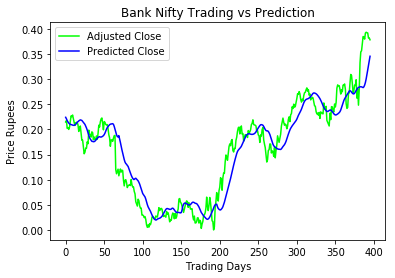

In [27]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [28]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00048111 MSE (0.02193420 RMSE)
Test Score: 0.00111130 MSE (0.03333616 RMSE)


In [29]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.001111 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from May 1, 2019 to May 31,2019. I have downloaded the data sets from NSE(National Stock Exchange) to check for robustness of the model.

In [30]:
import preprocess_data as ppd

data = pd.read_csv('robust.csv')
data.rename(columns={'Shares Traded':'Volume',
                          'Turnover (Rs. Cr)':'Turnover'},inplace=True)
stock = ppd.remove_data(data)

stock = ppd.get_normalised_data(stock)

stock = stock.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stock.head())

X = stock[:].as_matrix()
Y = stock[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  1.000000  0.971042  0.467259
1  0.841420  1.000000  0.408182
2  0.889171  0.893694  0.063564
3  0.951129  0.978501  1.000000
4  0.829865  0.973486  0.164771
(21, 1, 3)
(21,)
Test Score: 0.3308 MSE (0.5752 RMSE)
